## Index

- Resume
- Data Preparation
- Exploratory Data Analysis

# Resume

This notebook aims to determine the potential of the teams qualified for the QATAR 2022 World Cup based on the FIFA 22 player statistics.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
fifa23 = pd.read_csv('datos/Fifa 23 Players Data.csv')
fifa23.shape

(18539, 89)

In [3]:
fifa23.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [4]:
fifa23.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [5]:
interesting_columns = ['Known As', 'Age', 'Nationality', 'Overall', 'Potential', 'Value(in Euro)', 'Wage(in Euro)', 'Best Position', 'National Team Position']

In [6]:
fifa23 = pd.DataFrame(fifa23, columns=interesting_columns)
fifa23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Known As                18539 non-null  object
 1   Age                     18539 non-null  int64 
 2   Nationality             18539 non-null  object
 3   Overall                 18539 non-null  int64 
 4   Potential               18539 non-null  int64 
 5   Value(in Euro)          18539 non-null  int64 
 6   Wage(in Euro)           18539 non-null  int64 
 7   Best Position           18539 non-null  object
 8   National Team Position  18539 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.3+ MB


## - Variables description

- `"Known As"` → Player simplified name.


- `"Age"` → Age of player.


- `"Nationality"` → Country where the player was born and represents.


- `"Overall"` → Overall number of the player between 0-100.


- `"Potential"` → Potential number of the player between 0-100.


- `"Value (in Euro)"` → Value of the player represented in Euros.


- `"Wage (in Euro)"` → Wage of the player represented in Euros.


- `"Best Position"` → Position which the player feels more confortable. Only 1 position for simplification purposes.


- `"National Team Position"` → Position on which player plays on their National Team.


# Data Preparation

We will exclude the main injured or not called players for the FIFA World Cup. For example, Spain began a recontruction process for the National Team, leaving outside world cup some figures

In [7]:
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 
                            'G. Lo Celso', 'Piqué', 'Thiago', 'Parejo', 'Iago Aspas', 'M. Hummels', 'T. Kroos',
                            'Canales', 'Muniain', 'Gerard Moreno', 'De Gea', 'J. Tah', 'K. Volland', 'Oyarzabal',
                            'Fernando', 'Roberto Firmino', 'C. Nkunku']
drop_index = fifa23[fifa23['Known As'].isin(players_missing_worldcup)].index
fifa23.drop(drop_index, axis=0, inplace=True)

In [8]:
fifa23.head()

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position
0,L. Messi,35,Argentina,91,91,54000000,195000,CAM,RW
2,R. Lewandowski,33,Poland,91,91,84000000,420000,ST,ST
3,K. De Bruyne,31,Belgium,91,91,107500000,350000,CM,RF
4,K. Mbappé,23,France,91,95,190500000,230000,ST,ST
5,M. Salah,30,Egypt,90,90,115500000,270000,RW,-


### Importing countries present on Qatar 2022

In [9]:
teams = pd.read_csv('datos/Qatar2022-teams.csv', delimiter=';')
teams = teams['Team']
teams = list(teams)
len(teams)

32

Here I will filter teams that will participate in the world cup and eliminate the others.

In [10]:
fifa23 = fifa23[(fifa23["Nationality"].apply(lambda x: x in teams))]

In [11]:
countries = fifa23['Nationality'].unique()
countries

array(['Argentina', 'Poland', 'Belgium', 'France', 'Germany', 'Portugal',
       'Netherlands', 'England', 'Brazil', 'Korea Republic', 'Costa Rica',
       'Croatia', 'Spain', 'Senegal', 'Serbia', 'Switzerland', 'Uruguay',
       'Ghana', 'Morocco', 'Cameroon', 'Canada', 'Denmark', 'Mexico',
       'United States', 'Iran', 'Wales', 'Japan', 'Ecuador', 'Tunisia',
       'Australia', 'Saudi Arabia', 'Qatar'], dtype=object)

In [12]:
len(countries)

32

In [13]:
fifa23.isnull().sum()

Known As                  0
Age                       0
Nationality               0
Overall                   0
Potential                 0
Value(in Euro)            0
Wage(in Euro)             0
Best Position             0
National Team Position    0
dtype: int64

In [14]:
fifa23.drop_duplicates()

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position
0,L. Messi,35,Argentina,91,91,54000000,195000,CAM,RW
2,R. Lewandowski,33,Poland,91,91,84000000,420000,ST,ST
3,K. De Bruyne,31,Belgium,91,91,107500000,350000,CM,RF
4,K. Mbappé,23,France,91,95,190500000,230000,ST,ST
6,T. Courtois,30,Belgium,90,91,90000000,250000,GK,GK
...,...,...,...,...,...,...,...,...,...
18486,O. Awadh,18,Saudi Arabia,49,63,100000,600,CB,-
18491,T. Maddad,21,Saudi Arabia,49,58,110000,2000,RW,-
18519,T. Giraldo,19,Canada,48,64,120000,650,CAM,-
18523,M. Furaih,22,Saudi Arabia,48,57,110000,2000,CAM,-


# Exploratory Data Analysis (EDA)

#### Top 10 Players on the FIFA World Cup

In [15]:
fifa23.sort_values(['Overall'], ascending=False)[:10]

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position
0,L. Messi,35,Argentina,91,91,54000000,195000,CAM,RW
3,K. De Bruyne,31,Belgium,91,91,107500000,350000,CM,RF
4,K. Mbappé,23,France,91,95,190500000,230000,ST,ST
2,R. Lewandowski,33,Poland,91,91,84000000,420000,ST,ST
6,T. Courtois,30,Belgium,90,91,90000000,250000,GK,GK
7,M. Neuer,36,Germany,90,90,13500000,72000,GK,GK
8,Cristiano Ronaldo,37,Portugal,90,90,41000000,220000,ST,ST
9,V. van Dijk,30,Netherlands,90,90,98000000,230000,CB,CB
16,Ederson,28,Brazil,89,91,88000000,210000,GK,-
18,Alisson,29,Brazil,89,90,79000000,190000,GK,-


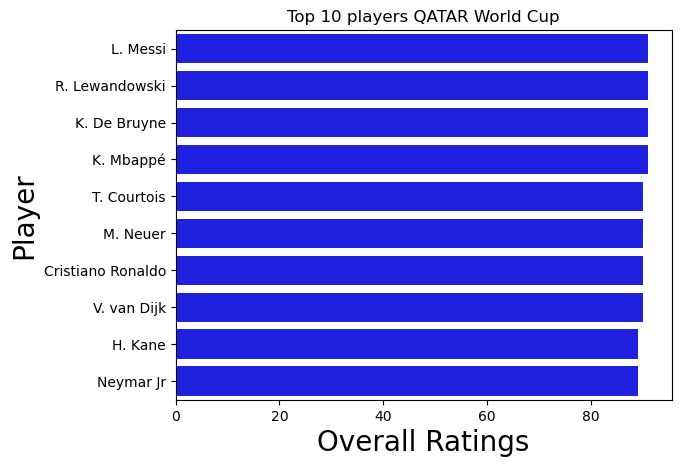

In [16]:
overall = fifa23['Overall']
player = fifa23['Known As']

x = fifa23['Known As'].head(10)
y = fifa23['Overall'].head(10)

ax= sns.barplot(x=y, y=x, color="blue", orient='h')
plt.xlabel('Overall Ratings', size=20) 
plt.ylabel('Player', size=20) 
plt.title('Top 10 players QATAR World Cup')

plt.show()

#### Function to determine top players per country

In [17]:
def top_10(country, top_number):
    df = fifa23.loc[fifa23['Nationality'] == country]
    df = df.sort_values(['Overall', 'Potential'], ascending=False)[:top_number]
    return df

##### Top 10 Players for Argentina

In [18]:
top_10('Argentina', 10)

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position
0,L. Messi,35,Argentina,91,91,54000000,195000,CAM,RW
59,L. Martínez,24,Argentina,86,90,98500000,110000,ST,ST
49,P. Dybala,28,Argentina,86,86,69500000,130000,CAM,SUB
77,M. Acuña,30,Argentina,85,85,46500000,46000,LB,LB
93,A. Gómez,34,Argentina,84,84,20000000,47000,CAM,SUB
106,E. Martínez,29,Argentina,84,84,29000000,95000,GK,GK
118,Á. Di María,34,Argentina,84,84,20000000,160000,RW,LW
123,R. De Paul,28,Argentina,84,84,42000000,85000,CM,CM
168,C. Romero,24,Argentina,83,88,49500000,95000,CB,CB
177,Á. Correa,27,Argentina,83,84,42500000,80000,CF,SUB


##### Top 10 Players for Brazil

In [19]:
top_10('Brazil', 10)

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position
16,Ederson,28,Brazil,89,91,88000000,210000,GK,-
18,Alisson,29,Brazil,89,90,79000000,190000,GK,-
11,Neymar Jr,30,Brazil,89,89,99500000,200000,LW,-
13,Casemiro,30,Brazil,89,89,86000000,240000,CDM,-
25,Marquinhos,28,Brazil,88,90,92000000,170000,CB,-
32,Fabinho,28,Brazil,87,88,77000000,185000,CDM,-
63,Vinícius Jr.,21,Brazil,86,92,109000000,200000,LW,-
50,Thiago Silva,37,Brazil,86,86,12000000,115000,CB,-
133,Éder Militão,24,Brazil,84,89,57500000,160000,CB,-
180,Bremer,25,Brazil,83,87,45500000,115000,CB,-


## Selection of Players present on the FIFA World Cup

We will determine the probable list of 26 players for every squad. 

For this calculation, we will consider Overall of players and we will include the following amount of players per position:

- 3 Goalkeepers

- 4 Center Defenders
- 2 Left Defenders
- 2 Right Defenders

- 3 Central Midfielders

- 9 Outside Midfielders / Outside Strikers / Offensive Midfielders

- 3 Strikers

We considered to join outside midfielders, outside strikers and offensive midfielders, in order to consider all good players on each team. For example if we may have considered only 1 advanced midfielder, a great player could be left outside. By this way, we may consider best players on each team, and including all positions needed. 

This calculation is needed because some countries have lack of players in some positions or lot of players on some. For example England on left defense or Argentina on right defense. England has like 7 first level right defenders, and it would not make any sense to include all them on the list of 26. If we do not consider this, the overall for each squad should incorrectly increase, since on the 26 list there should be no left defenders, and this of course is not realistic.


In [20]:
fifa23['Best Position'].value_counts()

CB     2327
ST     1574
CAM    1480
GK     1302
CDM     909
RM      866
CM      686
RB      549
LB      514
LM      485
RWB     283
LWB     268
RW      167
LW      125
CF       45
Name: Best Position, dtype: int64

In [21]:
main_positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Striker']
tomatch = {'GK': 'Goalkeeper', 
          'RCB': 'Defender', 'LCB': 'Defender', 'RB': 'Defender', 'LB': 'Defender', 'CB': 'Defender', 'RWB': 'Defender', 'LWB': 'Defender',
          'LCM': 'Midfielder', 'RDM':'Midfielder', 'RCM': 'Midfielder', 'RM': 'Midfielder', 'LM': 'Midfielder', 'CAM': 'Midfielder', 'LDM': 'Midfielder', 'CDM': 'Midfielder', 'CM': 'Midfielder', 'RAM': 'Midfielder', 'LAM': 'Midfielder',
          'ST': 'Striker', 'RS': 'Striker', 'LS': 'Striker', 'LW': 'Striker', 'RW': 'Striker',  'CF': 'Striker', 'RF': 'Striker', 'LF': 'Striker',
          'SUB': 'Substitute',
          'RES': 'Reserve'}

In [22]:
fifa23['Main Position'] = fifa23['Best Position'].map(tomatch)

In [23]:
# Function to determine the list of 26 for each country
def squad_selection_optimized(country):
    selection = []
    df = fifa23.loc[fifa23['Nationality'] == country]
    # 3 Goalkeepers
    top_3_gk = df.loc[fifa23['Best Position'] == 'GK'][:3]
    
    # 4 central defenders
    central_def = df.loc[fifa23['Best Position'] == 'CB'][:4]
    # 2 left defenders
    left_def = df.loc[(df['Best Position']=='LB') | (df['Best Position']=='LWB')][:2]
    # 2 right defenders
    right_def = df.loc[(df['Best Position']=='RB') | (df['Best Position']=='RWB')][:2]
    
    # 4 central midfielders
    defensive_mid = df.loc[(df['Best Position']=='CDM') | (df['Best Position']=='CM')][:4]
    
    # 8 outside midfielders (either left or right), outside strikers & advance midfielders
    att_players = df.loc[(df['Best Position']=='LM') | (df['Best Position']=='RM') | 
                       (df['Best Position']=='RW') | (df['Best Position']=='LW') |
                       (df['Best Position']=='CAM')][:8]
   
    # 3 Stikers 
    strikers = df.loc[(df['Best Position']=='ST') | (df['Best Position']=='CF')][:3]
    
    dataframe = pd.concat([top_3_gk, central_def, left_def, right_def, defensive_mid, att_players, strikers], ignore_index=True)

    return dataframe

In [24]:
squad_selection_optimized('Argentina')

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,E. Martínez,29,Argentina,84,84,29000000,95000,GK,GK,Goalkeeper
1,G. Rulli,30,Argentina,82,82,20500000,34000,GK,-,Goalkeeper
2,J. Musso,28,Argentina,81,82,20500000,47000,GK,SUB,Goalkeeper
3,C. Romero,24,Argentina,83,88,49500000,95000,CB,CB,Defender
4,N. Otamendi,34,Argentina,81,81,8500000,18000,CB,CB,Defender
5,J. Foyth,24,Argentina,79,84,24500000,29000,CB,-,Defender
6,M. Senesi,25,Argentina,78,83,18500000,44000,CB,-,Defender
7,M. Acuña,30,Argentina,85,85,46500000,46000,LB,LB,Defender
8,N. Tagliafico,29,Argentina,81,81,22500000,72000,LB,SUB,Defender
9,G. Montiel,25,Argentina,79,81,20000000,28000,RWB,SUB,Defender


In [25]:
squad_selection_optimized('England')

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,A. Ramsdale,24,England,82,86,34500000,62000,GK,SUB,Goalkeeper
1,J. Pickford,28,England,82,84,26000000,45000,GK,GK,Goalkeeper
2,N. Pope,30,England,81,81,17000000,75000,GK,SUB,Goalkeeper
3,F. Tomori,24,England,84,90,60500000,75000,CB,-,Defender
4,J. Stones,28,England,83,84,34500000,150000,CB,CB,Defender
5,H. Maguire,29,England,81,82,24000000,120000,CB,CB,Defender
6,C. Smalling,32,England,81,81,16500000,68000,CB,-,Defender
7,B. Chilwell,25,England,82,85,37000000,110000,LWB,LB,Defender
8,L. Shaw,26,England,80,81,22500000,105000,LB,-,Defender
9,K. Walker,32,England,85,85,37500000,170000,RB,RB,Defender


In [26]:
countries

array(['Argentina', 'Poland', 'Belgium', 'France', 'Germany', 'Portugal',
       'Netherlands', 'England', 'Brazil', 'Korea Republic', 'Costa Rica',
       'Croatia', 'Spain', 'Senegal', 'Serbia', 'Switzerland', 'Uruguay',
       'Ghana', 'Morocco', 'Cameroon', 'Canada', 'Denmark', 'Mexico',
       'United States', 'Iran', 'Wales', 'Japan', 'Ecuador', 'Tunisia',
       'Australia', 'Saudi Arabia', 'Qatar'], dtype=object)

##### Below we will create a DataFrame which includes all the players present on the FIFA World cup for the 32 teams.

In [27]:
appended_data = pd.DataFrame()
for country in countries:
    df = squad_selection_optimized(country)  
    appended_data = appended_data.append(df)

In [28]:
wcplayers = appended_data
wcplayers

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,E. Martínez,29,Argentina,84,84,29000000,95000,GK,GK,Goalkeeper
1,G. Rulli,30,Argentina,82,82,20500000,34000,GK,-,Goalkeeper
2,J. Musso,28,Argentina,81,82,20500000,47000,GK,SUB,Goalkeeper
3,C. Romero,24,Argentina,83,88,49500000,95000,CB,CB,Defender
4,N. Otamendi,34,Argentina,81,81,8500000,18000,CB,CB,Defender
...,...,...,...,...,...,...,...,...,...,...
21,Y. Abdurisag,22,Qatar,62,69,0,0,RW,-,Striker
22,A. Moustafa,25,Qatar,61,63,0,0,RM,SUB,Midfielder
23,A. Ali,25,Qatar,72,75,0,0,ST,ST,Striker
24,M. Muntari,28,Qatar,67,67,0,0,ST,SUB,Striker


We can see below that there are 3 Nations which do not complete the list of 26 per FIFA 23 Dataset. We will then define this ones.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Iran'),
  Text(1, 0, 'Costa Rica'),
  Text(2, 0, 'Tunisia'),
  Text(3, 0, 'Argentina'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Ecuador'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Wales'),
  Text(8, 0, 'United States'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Denmark'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'Cameroon'),
  Text(13, 0, 'Morocco'),
  Text(14, 0, 'Ghana'),
  Text(15, 0, 'Uruguay'),
  Text(16, 0, 'Switzerland'),
  Text(17, 0, 'Serbia'),
  Text(18, 0, 'Senegal'),
  Text(19, 0, 'Spain'),
  Text(20, 0, 'Croatia'),
  Text(21, 0, 'Korea Republic'),
  Text(22, 0, 'Brazil'),
  Text(23, 0, 'England'),
  Text(24, 0, 'Netherlands'),
  Text(25, 0, 'Portugal'),
  Text(26, 0, 'Germany'),
  Text(27, 0, 'France'),
  Text(28, 0, 'Belgium'),
  Text(29, 0, 'Poland'),
  Text(30, 0, 'Saudi Arabia'),
  Text(31, 0, 'Qatar')])

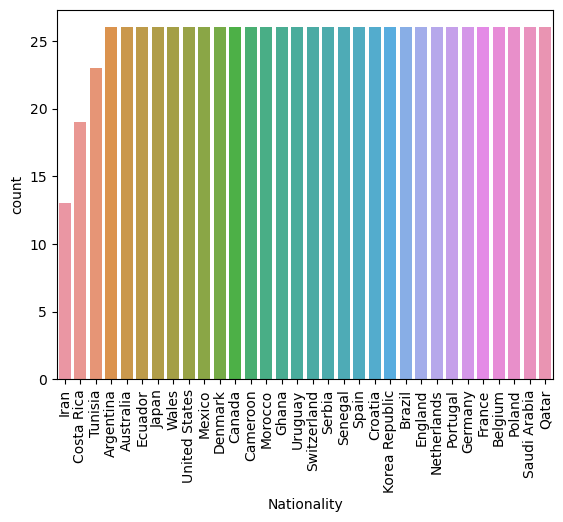

In [29]:
sns.countplot(data=wcplayers, x='Nationality', order=wcplayers['Nationality'].value_counts(ascending=True).index)
plt.xticks(rotation = 90)

### Best Squad Analysis

In [30]:

def get_best_squad(formation):
    fifa23_copy = fifa23.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            fifa23_copy.loc[[fifa23_copy[fifa23_copy['Best Position'] == i]['Overall'].idxmax()]]['Known As'].to_string(index=False),
            fifa23_copy[fifa23_copy['Best Position'] == i]['Overall'].max(),
            fifa23_copy.loc[[fifa23_copy[fifa23_copy['Best Position'] == i]['Overall'].idxmax()]]['Nationality'].to_string(index=False),
            fifa23_copy.loc[[fifa23_copy[fifa23_copy['Best Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index=False),
            fifa23_copy.loc[[fifa23_copy[fifa23_copy['Best Position'] == i]['Overall'].idxmax()]]['Value(in Euro)'].to_string(index=False),
            fifa23_copy.loc[[fifa23_copy[fifa23_copy['Best Position'] == i]['Overall'].idxmax()]]['Wage(in Euro)'].to_string(index=False)
        ])
        fifa23_copy.drop(fifa23_copy[fifa23_copy['Best Position'] == i]['Overall'].idxmax(), 
                         inplace=True)
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Best Position', 'Known As', 'Overall', 'Nationality', 'Age', 'Value(in Euro)', 'Wage(in Euro)']).to_string(index = False)



In [31]:
# Possible formations
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

##### Best 4-3-3 Formation

In [32]:
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print(get_best_squad(squad_433))

4-3-3
Best Position       Known As Overall Nationality Age Value(in Euro) Wage(in Euro)
           GK    T. Courtois      90     Belgium  30       90000000        250000
           RB      K. Walker      85     England  32       37500000        170000
           CB    V. van Dijk      90 Netherlands  30       98000000        230000
           CB     Rúben Dias      88    Portugal  25      107500000        230000
           LB   João Cancelo      88    Portugal  28       82500000        250000
          CDM       Casemiro      89      Brazil  30       86000000        240000
           CM   K. De Bruyne      91     Belgium  31      107500000        350000
          CAM       L. Messi      91   Argentina  35       54000000        195000
           RW    Á. Di María      84   Argentina  34       20000000        160000
           ST R. Lewandowski      91      Poland  33       84000000        420000
           LW      Neymar Jr      89      Brazil  30       99500000        200000


##### Best 4-4-2 Formation

In [33]:
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Best Position       Known As Overall Nationality Age Value(in Euro) Wage(in Euro)
           GK    T. Courtois      90     Belgium  30       90000000        250000
           RB      K. Walker      85     England  32       37500000        170000
           CB    V. van Dijk      90 Netherlands  30       98000000        230000
           CB     Rúben Dias      88    Portugal  25      107500000        230000
           LB   João Cancelo      88    Portugal  28       82500000        250000
           RM      S. Gnabry      85     Germany  26       59000000        100000
           CM   K. De Bruyne      91     Belgium  31      107500000        350000
           CM      L. Modrić      88     Croatia  36       29000000        230000
           LM       K. Coman      86      France  26       80000000        105000
           ST R. Lewandowski      91      Poland  33       84000000        420000
           ST      K. Mbappé      91      France  23      190500000        230000


##### Best 4-3-1-2 Formation

In [34]:
squad_4312 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CM', 'CAM', 'ST', 'ST']
print ('4-3-1-2')
print (get_best_squad(squad_4312))

4-3-1-2
Best Position       Known As Overall Nationality Age Value(in Euro) Wage(in Euro)
           GK    T. Courtois      90     Belgium  30       90000000        250000
           RB      K. Walker      85     England  32       37500000        170000
           CB    V. van Dijk      90 Netherlands  30       98000000        230000
           CB     Rúben Dias      88    Portugal  25      107500000        230000
           LB   João Cancelo      88    Portugal  28       82500000        250000
          CDM       Casemiro      89      Brazil  30       86000000        240000
           CM   K. De Bruyne      91     Belgium  31      107500000        350000
           CM      L. Modrić      88     Croatia  36       29000000        230000
          CAM       L. Messi      91   Argentina  35       54000000        195000
           ST R. Lewandowski      91      Poland  33       84000000        420000
           ST      K. Mbappé      91      France  23      190500000        230000


In [35]:
# Function to determine the list of best 11 players for each squad
def squad_selection_11(country, formation):
    selection = []
    df = fifa23.loc[fifa23['Nationality'] == country]
    # Goalkeepers
    top_3_gk = df.loc[fifa23['Best Position'] == 'GK'][:formation[0]]
    
    # central defenders
    central_def = df.loc[fifa23['Best Position'] == 'CB'][:formation[1]]
    # left defenders
    left_def = df.loc[(df['Best Position']=='LB') | (df['Best Position']=='LWB')][:formation[2]]
    # right defenders
    right_def = df.loc[(df['Best Position']=='RB') | (df['Best Position']=='RWB')][:formation[3]]
    
    # central midfielders
    defensive_mid = df.loc[(df['Best Position']=='CDM') | (df['Best Position']=='CM')][:formation[4]]
    # outside midfielders (either left or right), outside strikers & advance midfielders
    att_players = df.loc[(df['Best Position']=='LM') | (df['Best Position']=='RM') | 
                       (df['Best Position']=='RW') | (df['Best Position']=='LW') |
                       (df['Best Position']=='CAM')][:formation[5]]
   
    # Stikers 
    strikers = df.loc[(df['Best Position']=='ST') | (df['Best Position']=='CF')][:formation[6]]
    
    dataframe = pd.concat([top_3_gk, central_def, left_def, right_def, defensive_mid, att_players, strikers], ignore_index=True)

    return dataframe

In [36]:
formation_dictionary = {'4-4-2': [1, 2, 1, 1, 2, 2, 2],
                        '4-3-3': [1, 2, 1, 1, 3, 2, 1],
                        '4-3-1-2': [1, 2, 1, 1, 3, 1, 2],
                        '4-2-3-1': [1, 2, 1, 1, 2, 3, 1],
                        '5-4-1' : [1, 3, 1, 1, 2, 2, 1],
                        '5-3-2' : [1, 3, 1, 1, 3, 0, 2],
                        '3-5-2' : [1, 3, 0, 0, 3, 2, 2]}

formations = ['4-4-2', '4-3-3', '4-3-1-2', '4-2-3-1', '5-4-1', '5-3-2', '3-5-2']

In [37]:
squad_selection_11('Belgium', formation_dictionary['3-5-2'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,T. Courtois,30,Belgium,90,91,90000000,250000,GK,GK,Goalkeeper
1,T. Alderweireld,33,Belgium,82,82,14500000,30000,CB,CB,Defender
2,J. Vertonghen,35,Belgium,81,81,7000000,21000,CB,CB,Defender
3,W. Faes,24,Belgium,77,82,14500000,56000,CB,-,Defender
4,K. De Bruyne,31,Belgium,91,91,107500000,350000,CM,RF,Midfielder
5,Y. Tielemans,25,Belgium,84,86,52500000,115000,CM,CM,Midfielder
6,H. Vanaken,29,Belgium,80,80,20500000,34000,CM,SUB,Midfielder
7,Y. Carrasco,28,Belgium,85,85,54500000,90000,LM,LM,Midfielder
8,E. Hazard,31,Belgium,84,84,35000000,220000,LW,LF,Striker
9,R. Lukaku,29,Belgium,86,86,68000000,200000,ST,ST,Striker


In [38]:
# This function takes the Average Overalls for all Nations for each Squad

squads_df = pd.DataFrame(columns=['Nationality', 'Squad', 'Overall', 'Potential'])
for country in countries:
    for formation in formations:
        ove_avg = squad_selection_11(country, formation_dictionary[formation])['Overall'].mean()
        pot_avg = squad_selection_11(country, formation_dictionary[formation])['Potential'].mean()
        squads_df = squads_df.append({'Nationality' : country, 'Squad' : formation, 'Overall' : round(ove_avg, 2), 'Potential' : round(pot_avg, 2)}, ignore_index = True)

##### Best Argentina Squad

In [39]:
squads_df[squads_df['Nationality'] =='Argentina'].sort_values(by=['Potential', 'Overall'], ascending=False)

,Nationality,Squad,Overall,Potential
3,Argentina,4-2-3-1,84.0,85.45
0,Argentina,4-4-2,83.91,85.45
4,Argentina,5-4-1,83.55,85.45
6,Argentina,3-5-2,83.55,85.45
1,Argentina,4-3-3,83.73,85.27
2,Argentina,4-3-1-2,83.45,85.09
5,Argentina,5-3-2,82.36,84.45


As we can see above, 4-2-3-1 seems to be the best squad for Argentina, altough the differences are small

In [40]:
squad_selection_11('Argentina', formation_dictionary['4-2-3-1'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,E. Martínez,29,Argentina,84,84,29000000,95000,GK,GK,Goalkeeper
1,C. Romero,24,Argentina,83,88,49500000,95000,CB,CB,Defender
2,N. Otamendi,34,Argentina,81,81,8500000,18000,CB,CB,Defender
3,M. Acuña,30,Argentina,85,85,46500000,46000,LB,LB,Defender
4,G. Montiel,25,Argentina,79,81,20000000,28000,RWB,SUB,Defender
5,R. De Paul,28,Argentina,84,84,42000000,85000,CM,CM,Midfielder
6,L. Martínez,24,Argentina,81,86,35000000,95000,CDM,SUB,Midfielder
7,L. Messi,35,Argentina,91,91,54000000,195000,CAM,RW,Midfielder
8,P. Dybala,28,Argentina,86,86,69500000,130000,CAM,SUB,Midfielder
9,A. Gómez,34,Argentina,84,84,20000000,47000,CAM,SUB,Midfielder


##### Best Brazil Squad

In [41]:
squads_df[squads_df['Nationality'] =='Brazil'].sort_values(by=['Potential', 'Overall'], ascending=False)

,Nationality,Squad,Overall,Potential
62,Brazil,3-5-2,85.82,88.0
60,Brazil,5-4-1,85.64,87.36
57,Brazil,4-3-3,85.36,87.09
59,Brazil,4-2-3-1,85.55,86.82
56,Brazil,4-4-2,85.45,86.73
58,Brazil,4-3-1-2,85.0,86.18
61,Brazil,5-3-2,84.55,86.18


In [42]:
squad_selection_11('Brazil', formation_dictionary['3-5-2'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,Ederson,28,Brazil,89,91,88000000,210000,GK,-,Goalkeeper
1,Marquinhos,28,Brazil,88,90,92000000,170000,CB,-,Defender
2,Thiago Silva,37,Brazil,86,86,12000000,115000,CB,-,Defender
3,Éder Militão,24,Brazil,84,89,57500000,160000,CB,-,Defender
4,Casemiro,30,Brazil,89,89,86000000,240000,CDM,-,Midfielder
5,Fabinho,28,Brazil,87,88,77000000,185000,CDM,-,Midfielder
6,Bruno Guimarães,24,Brazil,81,86,38500000,88000,CM,-,Midfielder
7,Neymar Jr,30,Brazil,89,89,99500000,200000,LW,-,Striker
8,Vinícius Jr.,21,Brazil,86,92,109000000,200000,LW,-,Striker
9,Gabriel Jesus,25,Brazil,83,86,48500000,115000,ST,-,Striker


We can see above that 3-5-2 seems to be the best fit on Brasil. This is given the misteriously weird lack of lateral defenders with high overall for this world cup

##### Best France Squad

In [43]:
squads_df[squads_df['Nationality'] =='France'].sort_values(by=['Overall', 'Potential'], ascending=False)

,Nationality,Squad,Overall,Potential
25,France,5-4-1,84.45,86.73
24,France,4-2-3-1,84.45,86.64
21,France,4-4-2,84.45,86.27
27,France,3-5-2,84.36,86.73
22,France,4-3-3,84.09,86.45
23,France,4-3-1-2,84.0,86.36
26,France,5-3-2,83.82,86.55


In [44]:
squad_selection_11('France', formation_dictionary['5-4-1'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,H. Lloris,35,France,87,87,9000000,80000,GK,GK,Goalkeeper
1,L. Hernández,26,France,84,86,46000000,82000,CB,CB,Defender
2,R. Varane,29,France,84,85,39000000,155000,CB,CB,Defender
3,J. Koundé,23,France,84,89,57500000,150000,CB,SUB,Defender
4,T. Hernández,24,France,85,90,76000000,82000,LWB,SUB,Defender
5,J. Clauss,29,France,80,80,18500000,45000,RWB,SUB,Defender
6,A. Tchouaméni,22,France,82,89,61500000,145000,CDM,SUB,Midfielder
7,C. Tolisso,27,France,81,81,27500000,75000,CM,-,Midfielder
8,K. Coman,26,France,86,87,80000000,105000,LM,RM,Midfielder
9,N. Fekir,28,France,85,85,54500000,48000,CAM,-,Midfielder


##### Best Belgium Squad

In [45]:
squads_df[squads_df['Nationality'] =='Belgium'].sort_values(by=['Potential', 'Overall'], ascending=False)

,Nationality,Squad,Overall,Potential
20,Belgium,3-5-2,84.0,84.73
14,Belgium,4-4-2,83.55,84.0
18,Belgium,5-4-1,82.91,83.82
15,Belgium,4-3-3,83.18,83.64
16,Belgium,4-3-1-2,83.18,83.64
17,Belgium,4-2-3-1,83.18,83.64
19,Belgium,5-3-2,82.45,83.36


In [46]:
squad_selection_11('Belgium', formation_dictionary['3-5-2'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,T. Courtois,30,Belgium,90,91,90000000,250000,GK,GK,Goalkeeper
1,T. Alderweireld,33,Belgium,82,82,14500000,30000,CB,CB,Defender
2,J. Vertonghen,35,Belgium,81,81,7000000,21000,CB,CB,Defender
3,W. Faes,24,Belgium,77,82,14500000,56000,CB,-,Defender
4,K. De Bruyne,31,Belgium,91,91,107500000,350000,CM,RF,Midfielder
5,Y. Tielemans,25,Belgium,84,86,52500000,115000,CM,CM,Midfielder
6,H. Vanaken,29,Belgium,80,80,20500000,34000,CM,SUB,Midfielder
7,Y. Carrasco,28,Belgium,85,85,54500000,90000,LM,LM,Midfielder
8,E. Hazard,31,Belgium,84,84,35000000,220000,LW,LF,Striker
9,R. Lukaku,29,Belgium,86,86,68000000,200000,ST,ST,Striker


##### Best Spain Squad

In [47]:
squads_df[squads_df['Nationality'] =='Spain'].sort_values(by=['Potential', 'Overall'], ascending=False)

,Nationality,Squad,Overall,Potential
85,Spain,4-3-3,84.18,86.27
86,Spain,4-3-1-2,83.91,85.82
90,Spain,3-5-2,83.55,85.73
89,Spain,5-3-2,83.73,85.64
87,Spain,4-2-3-1,84.0,85.45
88,Spain,5-4-1,83.91,85.36
84,Spain,4-4-2,83.73,85.09


In [48]:
squad_selection_11('Spain', formation_dictionary['4-3-3'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,Unai Simón,25,Spain,83,86,37000000,30000,GK,GK,Goalkeeper
1,A. Laporte,28,Spain,86,87,64500000,195000,CB,CB,Defender
2,Pau Torres,25,Spain,83,89,50500000,43000,CB,SUB,Defender
3,Jordi Alba,33,Spain,85,85,28000000,190000,LB,LB,Defender
4,Carvajal,30,Spain,84,84,36500000,185000,RB,RB,Defender
5,Rodri,26,Spain,87,89,88500000,200000,CDM,SUB,Midfielder
6,Sergio Busquets,33,Spain,85,85,26500000,190000,CDM,CDM,Midfielder
7,Pedri,19,Spain,85,93,116000000,115000,CM,CM,Midfielder
8,Marcos Llorente,27,Spain,84,85,48000000,81000,CAM,SUB,Midfielder
9,Angeliño,25,Spain,83,85,42000000,64000,LM,-,Midfielder


##### Best England Squad

In [49]:
squads_df[squads_df['Nationality'] =='England'].sort_values(by=['Potential', 'Overall'], ascending=False)

,Nationality,Squad,Overall,Potential
50,England,4-3-3,84.64,87.73
49,England,4-4-2,84.73,87.55
52,England,4-2-3-1,84.64,87.45
55,England,3-5-2,84.55,87.45
53,England,5-4-1,84.36,87.27
51,England,4-3-1-2,84.64,87.09
54,England,5-3-2,84.18,86.73


In [50]:
squad_selection_11('England', formation_dictionary['4-3-3'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,A. Ramsdale,24,England,82,86,34500000,62000,GK,SUB,Goalkeeper
1,F. Tomori,24,England,84,90,60500000,75000,CB,-,Defender
2,J. Stones,28,England,83,84,34500000,150000,CB,CB,Defender
3,B. Chilwell,25,England,82,85,37000000,110000,LWB,LB,Defender
4,K. Walker,32,England,85,85,37500000,170000,RB,RB,Defender
5,T. Alexander-Arnold,23,England,87,90,100500000,150000,CM,-,Midfielder
6,J. Bellingham,19,England,84,91,81500000,41000,CM,SUB,Midfielder
7,D. Rice,23,England,84,87,52000000,83000,CDM,CM,Midfielder
8,R. Sterling,27,England,86,86,72500000,195000,LW,LW,Striker
9,P. Foden,22,England,85,92,109500000,180000,CAM,RW,Midfielder


##### Best Netherlands Squad

In [51]:
squads_df[squads_df['Nationality'] =='Netherlands'].sort_values(by=['Potential', 'Overall'], ascending=False)

,Nationality,Squad,Overall,Potential
46,Netherlands,5-4-1,83.36,85.73
45,Netherlands,4-2-3-1,83.18,85.55
43,Netherlands,4-3-3,83.0,85.36
42,Netherlands,4-4-2,82.91,85.27
44,Netherlands,4-3-1-2,82.73,85.0
48,Netherlands,3-5-2,83.18,84.82
47,Netherlands,5-3-2,82.82,84.73


In [52]:
squad_selection_11('Netherlands', formation_dictionary['5-4-1'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,J. Cillessen,33,Netherlands,80,80,7000000,13000,GK,-,Goalkeeper
1,V. van Dijk,30,Netherlands,90,90,98000000,230000,CB,CB,Defender
2,M. de Ligt,22,Netherlands,85,89,71000000,77000,CB,CB,Defender
3,S. de Vrij,30,Netherlands,84,84,34500000,88000,CB,SUB,Defender
4,T. Malacia,22,Netherlands,79,85,26500000,86000,LWB,SUB,Defender
5,D. Dumfries,26,Netherlands,82,84,34500000,73000,RWB,RWB,Defender
6,F. de Jong,25,Netherlands,87,92,116500000,230000,CM,CDM,Midfielder
7,T. Koopmeiners,24,Netherlands,80,84,30000000,49000,CM,SUB,Midfielder
8,C. Gakpo,23,Netherlands,83,87,52000000,29000,RM,SUB,Midfielder
9,A. Danjuma,25,Netherlands,82,83,36500000,43000,LM,-,Midfielder


#### Best Germany Squad

In [53]:
squads_df[squads_df['Nationality'] =='Germany'].sort_values(by=['Overall', 'Potential'], ascending=False)

,Nationality,Squad,Overall,Potential
29,Germany,4-3-3,85.36,86.18
31,Germany,4-2-3-1,85.27,86.18
34,Germany,3-5-2,85.18,86.27
32,Germany,5-4-1,85.09,85.91
28,Germany,4-4-2,84.73,86.0
30,Germany,4-3-1-2,84.73,86.0
33,Germany,5-3-2,84.27,85.55


In [54]:
squad_selection_11('Germany', formation_dictionary['4-3-3'])

,Known As,Age,Nationality,Overall,Potential,Value(in Euro),Wage(in Euro),Best Position,National Team Position,Main Position
0,M. Neuer,36,Germany,90,90,13500000,72000,GK,GK,Goalkeeper
1,A. Rüdiger,29,Germany,87,88,73500000,250000,CB,CB,Defender
2,N. Süle,26,Germany,85,87,59000000,72000,CB,CB,Defender
3,R. Gosens,27,Germany,82,82,29500000,59000,LWB,SUB,Defender
4,L. Klostermann,26,Germany,80,82,23000000,53000,RB,SUB,Defender
5,J. Kimmich,27,Germany,89,90,105500000,130000,CDM,CDM,Midfielder
6,L. Goretzka,27,Germany,87,88,91000000,115000,CM,SUB,Midfielder
7,İ. Gündoğan,31,Germany,85,85,44000000,185000,CM,CDM,Midfielder
8,T. Müller,32,Germany,87,87,63000000,115000,CAM,CAM,Midfielder
9,S. Gnabry,26,Germany,85,85,59000000,100000,RM,SUB,Midfielder


## Top Teams per Average Overall on the FIFA World Cup

###### This considers the 26 players on the list

In [55]:
top_10 = wcplayers[['Nationality', 'Overall', 'Potential']].groupby('Nationality')['Overall', 'Potential'].mean().sort_values(by='Overall',ascending=False)
df = pd.DataFrame(top_10)
df

,Overall,Potential
Nationality,,
Brazil,83.653846,85.346154
England,83.461538,85.923077
Germany,83.269231,85.384615
France,83.192308,85.346154
Spain,82.884615,84.500000
Portugal,82.807692,84.307692
Argentina,82.000000,83.615385
Netherlands,81.230769,84.115385
Belgium,80.538462,81.576923


Exporting dataset to an external folder

In [56]:
df.to_csv('datos/squadstats26.csv')

###### This only considers the 11 main squad players

In [57]:
tot_top_10 = squads_df[['Nationality', 'Overall', 'Potential']].groupby('Nationality')[['Overall', 'Potential']].mean().sort_values(by='Overall',ascending=False)
df = pd.DataFrame(tot_top_10)
df

,Overall,Potential
Nationality,,
Brazil,85.338571,86.908571
Germany,84.947143,86.012857
England,84.534286,87.324286
Portugal,84.340000,85.298571
France,84.231429,86.532857
Spain,83.858571,85.622857
Argentina,83.507143,85.230000
Belgium,83.207143,83.832857
Netherlands,83.025714,85.208571


In [58]:
df.to_csv('datos/squadstats11.csv')